In [1]:
import numpy
import librosa
from dtw.basic_operator import *

In [2]:
yes1 = "dtw/yes1.wav"
no2  =  "dtw/no2.wav"
yes3 =  "dtw/yes3.wav"

In [3]:
def mfcc(path):
    data,fs=librosa.load(path)
    # print(data)
    # print(data.shape)
    # print(fs)
    step1   =   pre_emphasis(data) 
    # print(step1)
    # print(step1.shape)
    step2   =   framing(step1,fs) 
    # print(step2)
    # print(step2.shape)
    step3   =   add_window(step2,fs)
    # print(step3)
    # print(step3.shape)
    step4   =   stft(step3) 
    # print(step4)
    # print(step4.shape)
    step5   =   mel_filter(step4, fs) 
    # print(step5)
    # print(step5.shape)
    fbank   =   log_pow(step5) 
    # print(fbank)
    # print(fbank.shape)
    mfcc  = discrete_cosine_transform(fbank)
    return mfcc
    # print(mfcc)
    # print(mfcc.shape)


In [4]:

def fbank(path):
    data,fs=librosa.load(path)
    # print(data)
    # print(data.shape)
    # print(fs)
    step1   =   pre_emphasis(data) 
    # print(step1)
    # print(step1.shape)
    step2   =   framing(step1,fs) 
    # print(step2)
    # print(step2.shape)
    step3   =   add_window(step2,fs)
    # print(step3)
    # print(step3.shape)
    step4   =   stft(step3) 
    # print(step4)
    # print(step4.shape)
    step5   =   mel_filter(step4, fs) 
    # print(step5)
    # print(step5.shape)
    fbank   =   log_pow(step5) 
    # print(fbank)
    # print(fbank.shape)
    
    return fbank
    # print(mfcc)
    # print(mfcc.shape)

In [5]:
def DTWDistance(s1, s2):
    DTW={}
    len1=s1.shape[0]
    len2=s2.shape[0]
    dist = np.zeros((len1,len2))
  
    for i in range(len1):
        for j in range(len2):
            dist[i][j]=(sum((s1[i][:]-s2[j][:])*(s1[i][:]-s2[j][:]))) # 这时一个二维矩阵

 
    for i in range(len1):
        DTW[(i, -1)] = float('inf')
    for i in range(len2):
        DTW[(-1, i)] = float('inf')
    DTW[(-1, -1)] = 0
 
    for i in range(len1):
        for j in range(len2):
            # TODO1
            # 理解dtw算法，此处写入递推公式
            # 计算二维矩阵之间的距离
            distance = dist[i][j]
            DTW[(i, j)] = distance + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])

    return np.sqrt(DTW[len1-1, len2-1])

In [6]:
# TODO2
# 导入wav文件，计算mfcc，用mfcc计算两个wav文件的dtw距离
yes1_signal, yes1_sample_rate = librosa.load(yes1)
no2_signal, yes1_sample_rate = librosa.load(no2)
yes3_signal, yes3_sample_rate = librosa.load(yes3)

In [7]:
# 计算mfcc
yes1_mfcc = mfcc(yes1)
no2_mfcc = mfcc(no2)
yes3_mfcc = mfcc(yes3)

In [8]:
# 计算dtw距离
dtw12 = DTWDistance(yes1_mfcc, no2_mfcc)
dtw12

1683.619700361205

In [9]:
# 计算dtw距离
dtw13 = DTWDistance(yes3_mfcc, yes1_mfcc)
dtw13

1010.1938036100519

In [10]:
# TODO3
# 将yes1和yes3两个音频，每一帧之间的对应关系用图表的形式画出来
# yes1作为x轴，yes3作为y轴
# 提示：在动态规划算法之中，保存算入最终dtw距离的两帧的索引index1和index2，以index1为x轴，index2为y轴画图
# 注: 需要记录对应的动态规划算法的路径, index1和index2
# 回溯路径求解:
def DTW_Get(s1, s2):
    DTW={}
    len1=s1.shape[0]
    len2=s2.shape[0]
    dist = np.zeros((len1,len2))
  
    for i in range(len1):
        for j in range(len2):
            dist[i][j]=(sum((s1[i][:]-s2[j][:])*(s1[i][:]-s2[j][:]))) # 这时一个二维矩阵

 
    for i in range(len1):
        DTW[(i, -1)] = float('inf')
    for i in range(len2):
        DTW[(-1, i)] = float('inf')
    DTW[(-1, -1)] = 0
 
    for i in range(len1):
        for j in range(len2):
            # TODO1
            # 理解dtw算法，此处写入递推公式
            # 计算二维矩阵之间的距离
            distance = dist[i][j]
            DTW[(i, j)] = distance + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])

    return DTW

def backpath(s1, s2, DTW):
    i = s1.shape[0] - 1
    j = s2.shape[0] - 1
    y1 = [] # 记录索引
    y3 = []

    y1.append(i)
    y3.append(j)
    while i > 0 or j > 0:
        a = DTW[i - 1, j - 1] if i > 0 and j > 0 else float("inf")
        b = DTW[i - 1, j] if i > 0 else float("inf")
        c = DTW[i, j - 1] if j > 0 else float("inf")
        min_val = min([a, b, c])
        if a == min([a, b, c]):
            i -= 1
            j -= 1
            y1.append(i)
            y3.append(j)
        elif b == min([a, b, c]):
            i = i - 1
            y1.append(i)
            y3.append(j)
        else:
            j = j - 1
            y1.append(i)
            y3.append(j)
    return y1, y3

In [11]:
DTW = DTW_Get(yes1_mfcc, yes3_mfcc)
print(DTW[98,118])

1020491.520852144


In [12]:
y1, y3 = backpath(yes1_mfcc, yes3_mfcc, DTW)

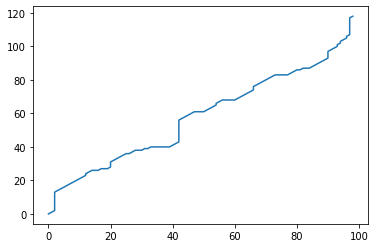

In [13]:
import matplotlib.pyplot as plt
import matplotlib as mpl
# yes1作为x轴，yes3作为y轴
fig, ax = plt.subplots() # the simplest way of creating a fighure with an axes
ax.plot(y1, y3) # use this to draw some data on the axes
plt.show()